In [407]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [409]:
matplotlib.__version__

'3.9.2'

In [411]:
#Import
path_merge = r'/Users/janekobtseva/10-10-2025 Brazilian E-Commerce Public Dataset/02 Data/Prepared Data/merge.pkl'

In [413]:
df_merge = pd.read_pickle(os.path.join(path_merge))

In [414]:
### Exploring Relationships

In [417]:
#I tried to Explore relationships with a price in one group of variables and with freight_value with another group of variable
#Honestly, I guess data is not the best for this kind of illustrations 

In [419]:
#Preparing data
df_merge.dtypes

order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
seller_zip_code_

In [423]:
df_merged_cor=df_merge.drop(columns = ['product_name_lenght','product_description_lenght',
                                    'product_photos_qty',
                                    'product_length_cm','product_height_cm',
                                    'product_width_cm',
                                    'seller_zip_code_prefix','review_answer_timestamp',
                                    'order_purchase_timestamp',
                                    'order_id','order_item_id',
                                    'product_id','seller_id',
                                    'customer_id',
                                     'shipping_limit_date',
                                     'order_status','order_approved_at',
                                    'order_delivered_carrier_date','order_delivered_customer_date',
                                    'order_estimated_delivery_date',
                                    'review_id','order_item_id',
                                    'product_id','review_comment_title',
                                    'review_comment_message',
                                     'review_creation_date',
                                     'payment_type','seller_city',
                                    'seller_state','customer_unique_id',
                                    'customer_city',
                                    'customer_state',
                                    'product_category_name'])

In [425]:
df_merged_cor.dtypes

price                       float64
freight_value               float64
review_score                  int64
payment_sequential            int64
payment_installments          int64
payment_value               float64
customer_zip_code_prefix      int64
product_weight_g            float64
dtype: object

In [431]:
df_merged_cor.head()

,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,product_weight_g
0,58.90,13.29,5,1,2,72.19,28013,650.0
1,239.90,19.93,4,1,3,259.83,15775,30000.0
2,199.00,17.87,5,1,5,216.87,35661,3050.0
3,12.99,12.79,4,1,2,25.78,12952,200.0
4,199.90,18.14,5,1,3,218.04,13226,3750.0


In [439]:
# Create a correlation matrix using pandas

# price has a strong relationship with payment value, as I belive it is the biggest component of it
# interesting, that price has also moderate relationship with freight value. 
#maybe because there is a relationship between the size and price of the product. 
#there is also a strong relationship between procduct weight and freight value 
# we can see that review has no relationship with any of the variables


df_merged_cor.corr()

,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,product_weight_g
price,1.000000,0.412758,0.003345,-0.000106,0.279834,0.738838,0.042097,0.341492
freight_value,0.412758,1.000000,-0.033587,0.007139,0.186240,0.372855,0.225714,0.611851
review_score,0.003345,-0.033587,1.000000,0.005465,-0.043271,-0.081139,-0.026952,-0.026855
payment_sequential,-0.000106,0.007139,0.005465,1.000000,-0.087981,-0.065724,-0.029422,0.025277
payment_installments,0.279834,0.186240,-0.043271,-0.087981,1.000000,0.274617,0.057397,0.179621
payment_value,0.738838,0.372855,-0.081139,-0.065724,0.274617,1.000000,0.051359,0.308238
customer_zip_code_prefix,0.042097,0.225714,-0.026952,-0.029422,0.057397,0.051359,1.000000,0.001198
product_weight_g,0.341492,0.611851,-0.026855,0.025277,0.179621,0.308238,0.001198,1.000000


In [367]:
sub_cor_freigt = df_merge[['product_photos_qty','product_weight_g', 'product_length_cm', 'product_height_cm','freight_value','product_width_cm']]

In [441]:
#There is a strong correlation between freight_value and product_weight_g
# While product_weight_g has a strong correlation with product_height_cm and product_width_cm
#Thus I decided to stay further with this group of variables 
sub_cor_freigt.corr()

,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,freight_value,product_width_cm
product_photos_qty,1.000000,0.022164,0.046070,-0.034872,0.022434,0.007037
product_weight_g,0.022164,1.000000,0.458549,0.582952,0.611851,0.505455
product_length_cm,0.046070,0.458549,1.000000,0.188631,0.303161,0.534984
product_height_cm,-0.034872,0.582952,0.188631,1.000000,0.391785,0.275387
freight_value,0.022434,0.611851,0.303161,0.391785,1.000000,0.321990
product_width_cm,0.007037,0.505455,0.534984,0.275387,0.321990,1.000000


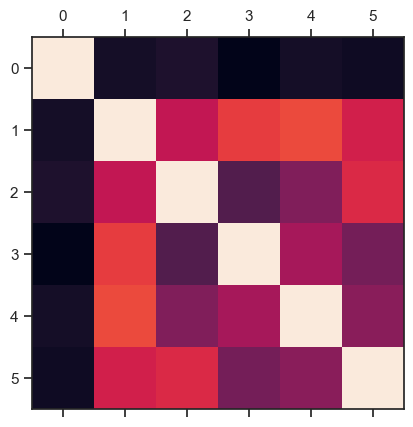

In [443]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub_cor_freigt.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

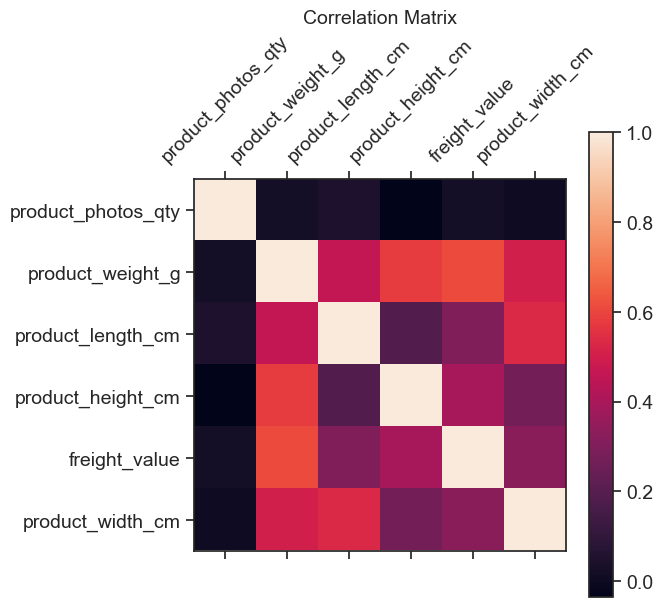

In [445]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(6, 6)) # figure size 
plt.matshow(sub_cor_freigt.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_cor_freigt.shape[1]), sub_cor_freigt.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub_cor_freigt.shape[1]), sub_cor_freigt.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [447]:
#### Create a correlation heatmap using seaborn:

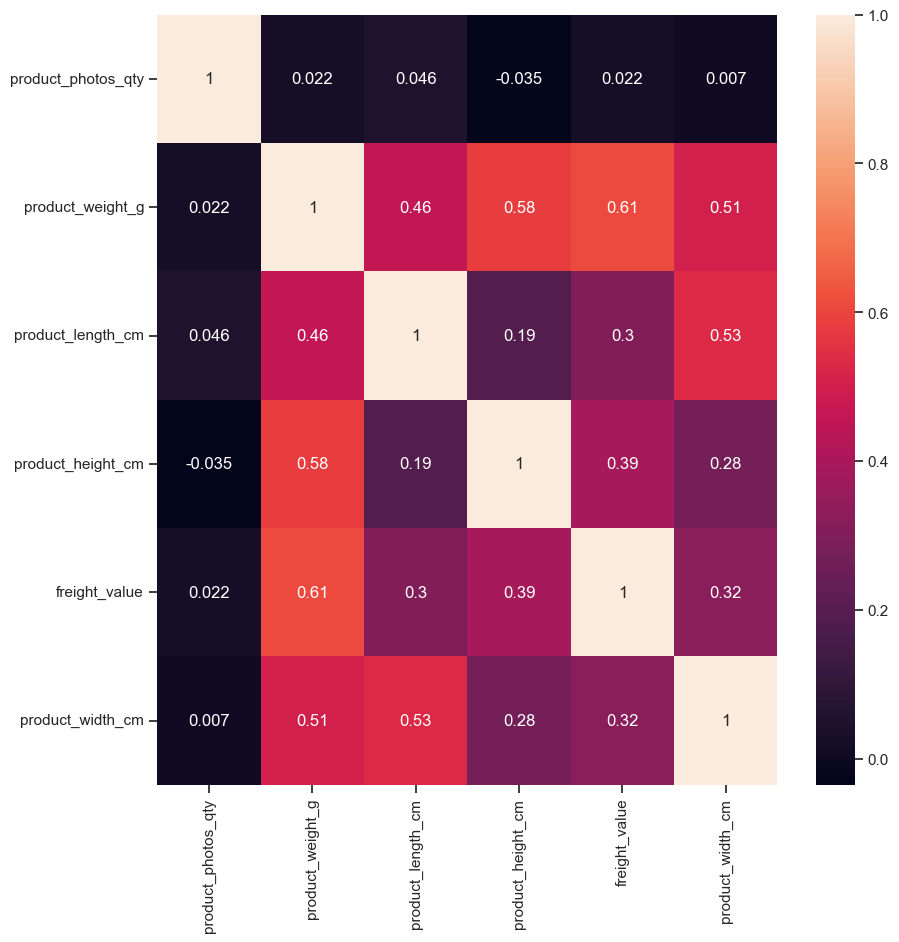

In [449]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn 
corr = sns.heatmap(sub_cor_freigt.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

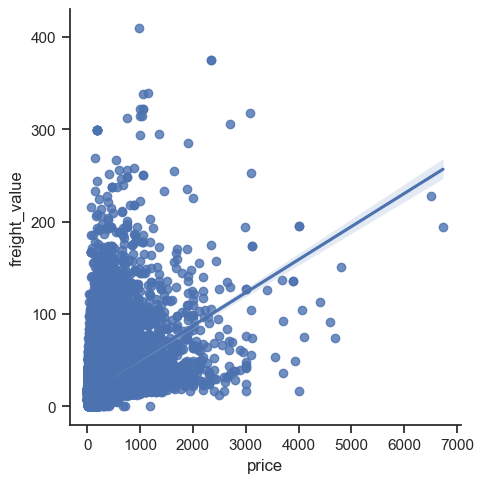

In [451]:
# Create a scatterplot 
#In the firat group of variables the strongest correlation was between price and freight_value, thus I decided to use it for this task 
# price has a strong relationship with payment value, as I belive it is the biggest component of it.
# at the same time we see some outliers, where price is staying lower, than the payment_value

sns.lmplot(x = 'price', y = 'freight_value', data = df_merged_cor)

In [453]:
### Pair Plots:

In [455]:
# Keep only the variables you want to use in the pair plot

sub = sub_cor_freigt[['product_weight_g', 'freight_value', 'product_length_cm', 'product_height_cm', 'product_width_cm']]

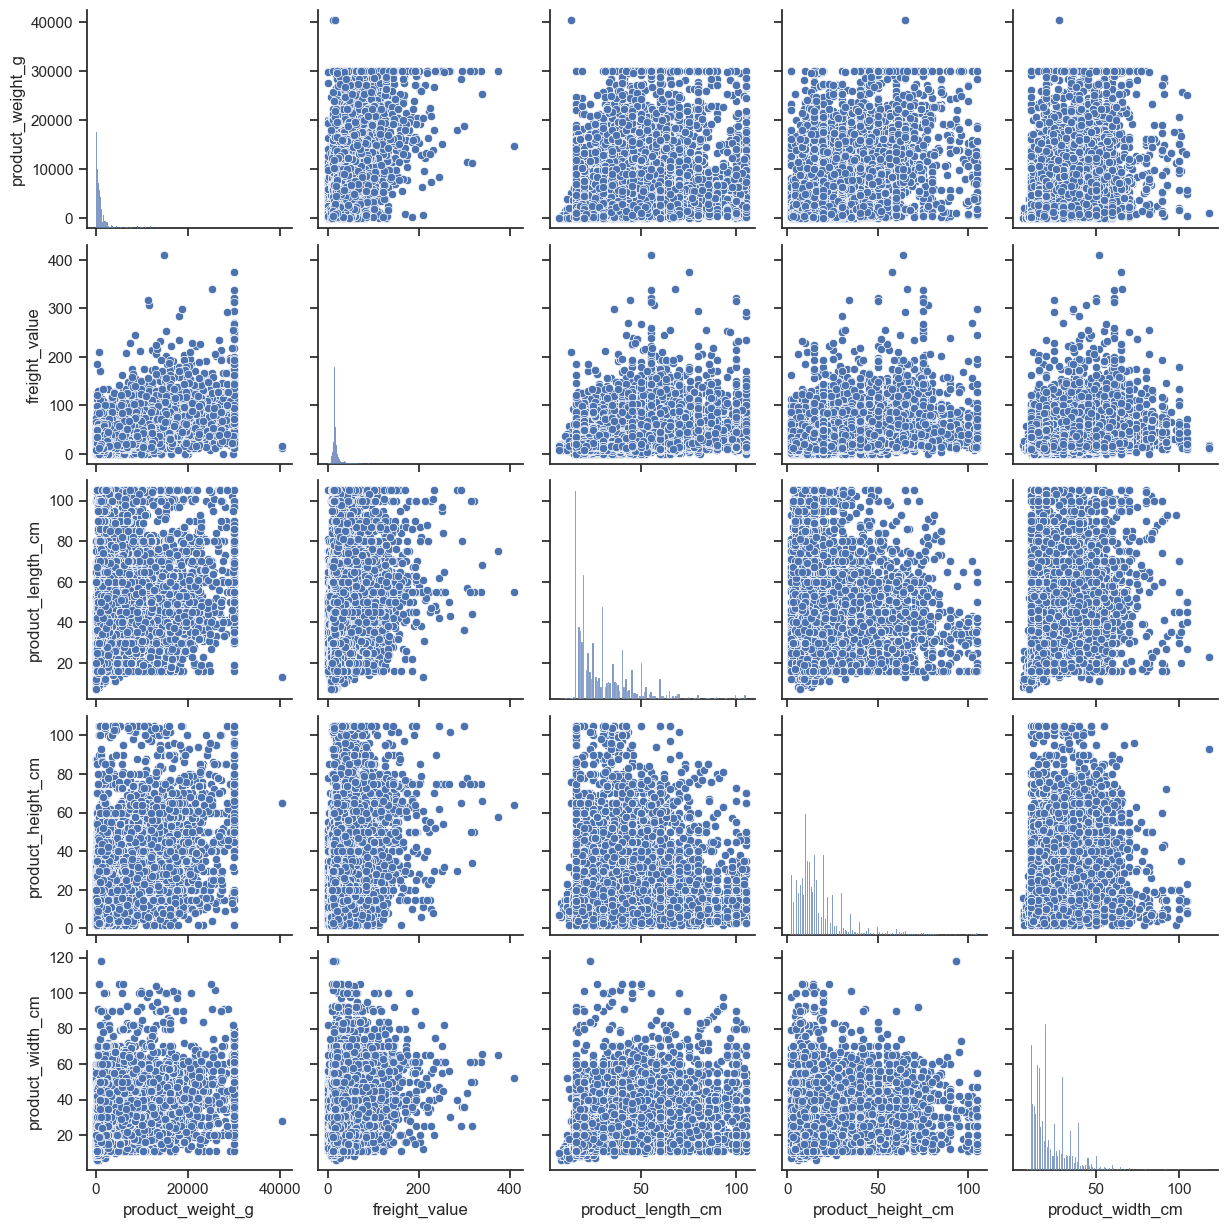

In [459]:
# Create a pair plot 
#In the second group of variables all of them had middle to high correlation, thus I guess they are all a bit mesed up
g = sns.pairplot(sub)

In [460]:
### Categorical Plots:

<Axes: xlabel='product_weight_g', ylabel='Count'>

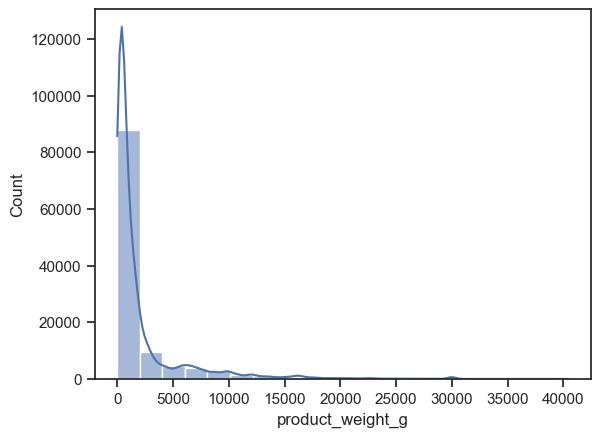

In [461]:
sns.histplot(df_merged_cor['product_weight_g'], bins = 20, kde = True)

In [462]:
df_merged_cor.loc[df_merged_cor['product_weight_g'] < 5000, 'product_weight_category'] = 'Low weight'

In [465]:
df_merged_cor.loc[(df_merged_cor['product_weight_g'] >= 5000) & (df_merged_cor['product_weight_g'] < 10000), 'product_weight_category'] = 'Middle weight'

In [469]:
df_merged_cor.loc[df_merged_cor['product_weight_g'] >= 15000, 'product_weight_category'] = 'High weight'

In [471]:
df_merged_cor['product_weight_category'].value_counts(dropna = False)

product_weight_category
Low weight       99039
Middle weight     8806
NaN               2986
High weight       2401
Name: count, dtype: int64

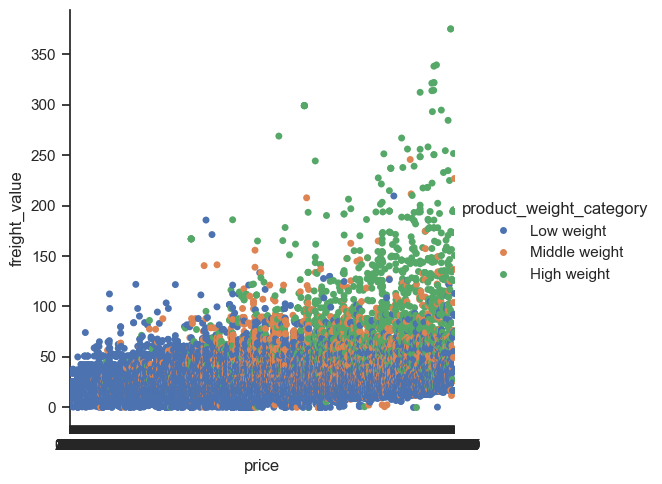

In [473]:
# Create a categorical plot in seaborn using the weight categories created above

sns.set(style="ticks")
g = sns.catplot(x="price", y="freight_value", hue="product_weight_category", data=df_merged_cor)

In [475]:
#it is quite hard to read the diagram
#I believe, that low weighted products equate to lower freight_value at the same time there is no strong relationship 
#between low_weight and product price
#Product with high weight equete more to the highter freight_price

In [477]:
#What I do want to see is how all the products fall and product categories. And if we can get any interesting information from their 
#As well as to look at the customer reviews

In [ ]:
#Regarding hyporthesis 
#1- Do product categories depend on the 